<a href="../01_LTI/_index.ipynb">&larr; LTI-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# Faltung #

Dieses Notebook demonstriert interaktiv die zeitdiskrete Faltung. Die diskrete Faltung ist definiert durch
$$
y[n] = x[n] \ast h[n] = \sum_{i = -\infty}^{+\infty} x[i] h[n-i]
$$

Man kann sich diesen Vorgang so vorstellen, dass die Impulsantwort $h[n]$ über das Signal $x[n]$ geschoben wird:

**Beispiel**: $h[n] = \delta[n] = \begin{cases} 1 \text{ für }n=0 \\0 \text{ sonst.}\\ \end{cases}$ (Diracstoß)  und  $x[n] = \{1; 2; 3\}$.

$n = 0\, \rightarrow \, y[0] = x[0] \cdot 1 = 1$;  $n = 1\; \rightarrow \, y[1] = x[1] \cdot 1 = 2$; $n = 2\, \rightarrow \, y[2] = x[2] \cdot 1 =3$; $y$ ist ansonsten $0$.

Hier zeigt sich die Siebeigenschaft des Diracstoßes: Nur wenn das Argument 0 ist ($i = n$), liefert der Diracstoß einen Beitrag, er siebt quasi den zugehörigen Wert $x[n]$ aus.

Ein System mit der Impulsantwort $h[n] = \{1; 2\}$ kann man sich als die Überlagerung zweier zeitversetzter Systeme $h_1[n] = \delta[n]$ und $h_2[n] = 2 \delta[n-1]$ vorstellen. Das funktioniert nur für lineare, zeitinvariante Systeme, daher ist die Faltung auch nur für LTI-Systeme definiert. Für das Signal $x[n] = \{1; 2; 3\}$ erhält man:

$$
n = 0\, \rightarrow \, y[0] = \ldots + \underbrace{x[-1]h[1]}_{= 0} + \underbrace{x[0]h[0]}_{=1} + \underbrace{x[1]h[-1]}_{=0} + \ldots = 1
$$

$$
n = 1\, \rightarrow \, y[1] = \ldots + \underbrace{x[-1]h[2]}_{= 0} + \underbrace{x[0]h[1]}_{=2} + \underbrace{x[1]h[0]}_{=2} + \ldots = 4
$$

$$
n = 2\, \rightarrow \, y[2] = \ldots  + \underbrace{x[0]h[2]}_{=0} + \underbrace{x[1]h[1]}_{=4} +  \underbrace{x[2]h[0]}_{=3} + \ldots = 7
$$

$$
n = 3\, \rightarrow \, y[3] = \ldots  + \underbrace{x[1]h[2]}_{=0} + \underbrace{x[2]h[1]}_{=6} +  \underbrace{x[3]h[0]}_{=0} + \ldots = 6
$$

$y$ ist ansonsten $0$.


Diese Art die Faltung zu berechnen eignet sich vor allem für Systeme mit kurzer Impulsantwort und für lange Eingangsfolgen, da immer nur ein paar Samples von $x[n]$ zur Rechnung beitragen. Da die Faltung kommutativ ist, kann man z.B. für kurze Eingangsfolgen auch die "umgedrehte" Variante verwenden:
$$
y[n] = h[n] \ast x[n] = \sum_{i = -\infty}^{+\infty} h[i] x[n-i]
$$


In [1]:
#%matplotlib inline
# "inline" renders using inline png graphics
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import animation
from IPython.display import HTML
from IPython import __version__ as ipy_version

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp
dsp.versions()
print("IPython:", ipy_version)

plt.rcParams.update(dsp.mpl_rc) # define plot properties 
plt.rcParams['figure.figsize'] = (5,5)

Python version: 3.7.4
Numpy: 1.19.1
Scipy: 1.5.2
Matplotlib: 3.2.2 module://ipykernel.pylab.backend_inline
IPython: 7.18.1


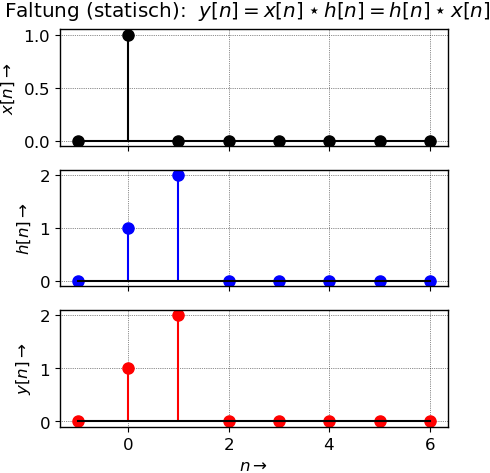

In [2]:
# Convolution 1: x * h -> slide h along x
# define signal and impulse response here
#h = [1, 1, 1, 1, 1, 1] # impulse response
h = [1, 2]
# input signal
x = [1, 2, 3] 
x = [1, 0, 0, 0, 0]

y = np.convolve(x, h)
L = len(y)+2 # max. total length plus one sample padding on both sides

# create padded arrays padded with identical lengths for static plotting
len_h = len(h) # length of impulse response
len_x = len(x) # length of input signal
n = np.arange(L)-1 # index runs from n = -1 to L-2
xp = np.pad(x, (1, L-len_x-1), 'constant', constant_values=(0,0))# fill up with zeros 
hp = np.pad(h, (1, L-len_h-1), 'constant', constant_values=(0,0))# for total length of L
yp = np.pad(y, (1, 1), 'constant', constant_values=(0,0)) # to plot all in a common figure

# First set up the figure, the axis, and the plot element(s) we want to animate. %%caption suppresses blank window
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
ax[0].stem(n, xp, 'k-', 'ko', 'k', use_line_collection=True) # input signal
ax[1].stem(n, hp, 'b-', 'bo', 'k', use_line_collection=True) # impulse response
ax[2].stem(n, yp, 'r-', 'ro', 'k', use_line_collection=True) # output signal

fig.suptitle(r'Faltung (statisch):  $y[n] = x[n] \star h[n] = h[n] \star x[n]$')
ax[0].set_ylabel(r'$x[n] \rightarrow$')
ax[1].set_ylabel(r'$h[n] \rightarrow$')
ax[2].set_ylabel(r'$y[n] \rightarrow$')
ax[2].set_xlabel(r'$n \rightarrow$');
fig.subplots_adjust(top=0.92);
x_ylim = ax[0].get_ylim()
h_ylim = ax[1].get_ylim()
y_ylim = ax[2].get_ylim()

In [3]:
# create zero padded copies for animation plotting
x_i = np.pad(x, (len_h, len_h), 'constant', constant_values=(0,0))
L_i = len(x_i)
h_i = np.pad(h[::-1], (L_i, L_i), 'constant', constant_values=(0,0)) # reverse h and pad it 
k = np.arange(-len_h, L_i-len_h)

def init():
    # this is called twice at the beginning by matplotlib
    y_i = np.zeros(2*L_i)
    ax[0].cla()
    ax[0].stem(k, x_i, 'k-', 'ko', 'k', use_line_collection=True) # input signal 
    ax[0].set_ylabel(r'$x[n] \rightarrow$');
    fig.suptitle(r'Faltung $y[n] = x[n] \star h[n]$')

def animate_h(n):
    print(n,'.', end='', sep='') # suppress endline terminator and white space between numbers
    h_k = h_i[L_i - n:2*L_i - n]
    ax[1].cla()
    ax[1].stem(k, h_k , 'b-', 'bo', 'b', use_line_collection=True) # x[-2] is second element from the end
    ax[1].set_ylabel(r'$h[n-i] \rightarrow$')
    y_i[n+len_h-1] = np.sum(x_i * h_k)
    ax[2].cla()
    ax[2].stem(k, y_i[:L_i], 'r-', 'ro', 'r', use_line_collection=True)
    ax[2].scatter(n-1, y_i[n+len_h-1], s=(plt.rcParams['lines.markersize']*1.5)**2, c='darkgreen', alpha=0.5)
    ax[2].text(0.05,0.8,"n = {0:d}".format(n-1),transform=ax[2].transAxes, fontsize=14, ha='left', va='center',
              bbox={'alpha':0.5, 'color':'wheat'})
    ax[2].set_ylim(y_ylim)
    ax[2].set_xlabel(r'$i,\, n\, \rightarrow$');
    ax[2].set_ylabel(r'$y[n] \rightarrow$');

y_i = np.zeros(2*L_i)

ani = animation.FuncAnimation(fig, animate_h, frames=L_i-1, init_func=init)
ani

0.1.2.3.4.5.6.7.

**Aufgaben:**
- Spielen Sie mit verschiedenen Eingangssignalen und Impulsantworten herum
- Versuchen Sie, nachzuvollziehen, wie das Ausgangssignal entsteht 

***
**Copyright**

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.